# JobSpark - Image Classification

Image Classification using CNN

## Import neccessary library

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import os
from tensorflow.keras.layers import Dense, Dropout, Input, Conv2D, Flatten, GlobalAveragePooling2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

## Import dataset

In [ ]:
base_dir = '/kaggle/input/datasetml/Coba DS'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'val')

In [ ]:
os.listdir(train_dir)

['DS', 'Normal']

In [ ]:
os.listdir(test_dir)

['DS', 'Normal']

## Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=90,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    vertical_flip=True,
                    fill_mode='nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

Found 2399 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


## Building Model

In [ ]:
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3),
           kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu',
           kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu',
           kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu',
           kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),

    Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001))  # Binary Classification (sigmoid activation)
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,679,041 (36.92 MB)

 Trainable params: 9,679,041 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

## Model Training

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    callbacks=[early_stopping]
)

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733901401.326989     110 service.cc:145] XLA service 0x79fd58008150 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733901401.327045     110 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733901401.327049     110 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 2/75 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.5312 - loss: 1.9475  

I0000 00:00:1733901414.967532     110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 568ms/step - accuracy: 0.5118 - loss: 1.9034

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


75/75 ━━━━━━━━━━━━━━━━━━━━ 67s 632ms/step - accuracy: 0.5119 - loss: 1.8968 - val_accuracy: 0.5000 - val_loss: 1.0270
Epoch 2/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 368ms/step - accuracy: 0.5228 - loss: 0.9806 - val_accuracy: 0.5000 - val_loss: 0.8891
Epoch 3/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 374ms/step - accuracy: 0.5650 - loss: 0.8586 - val_accuracy: 0.5083 - val_loss: 0.8343
Epoch 4/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 364ms/step - accuracy: 0.6105 - loss: 0.7981 - val_accuracy: 0.5333 - val_loss: 0.8075
Epoch 5/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 373ms/step - accuracy: 0.6092 - loss: 0.7530 - val_accuracy: 0.5483 - val_loss: 0.7824
Epoch 6/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 371ms/step - accuracy: 0.6284 - loss: 0.7281 - val_accuracy: 0.6367 - val_loss: 0.7483
Epoch 7/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 372ms/step - accuracy: 0.6369 - loss: 0.7079 - val_accuracy: 0.6033 - val_loss: 0.7628
Epoch 8/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 376ms/step - accuracy: 0.6439 - loss: 0.6902 - val_accuracy: 0.623

## Model Evaluation

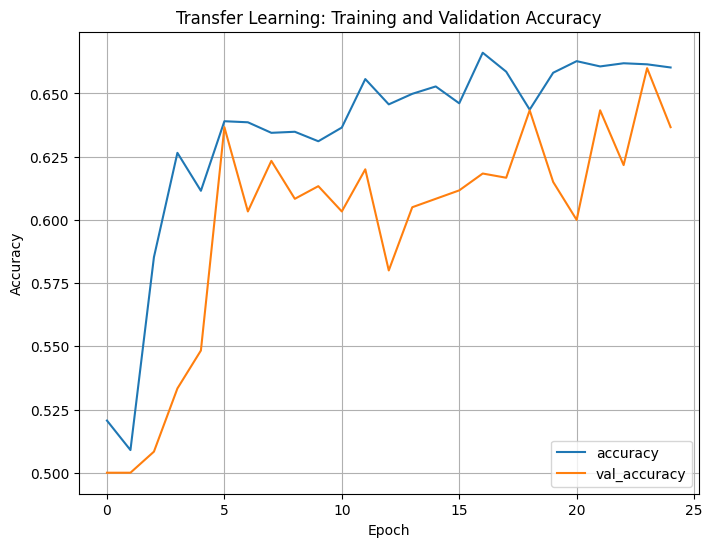

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Transfer Learning: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Transfer Learning

In [ ]:
input_shape = (224, 224, 3)

base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=input_shape
)

base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

In [ ]:
model_transfer = Model(inputs=base_model.input, outputs=predictions)

model_transfer.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(0.0001),
    metrics=['accuracy']
)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)
history_transfer = model_transfer.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    callbacks = [early_stopping]
)

Epoch 1/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 53s 523ms/step - accuracy: 0.5794 - loss: 0.7170 - val_accuracy: 0.6617 - val_loss: 0.6229
Epoch 2/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 350ms/step - accuracy: 0.7064 - loss: 0.5831 - val_accuracy: 0.6900 - val_loss: 0.5885
Epoch 3/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 347ms/step - accuracy: 0.6926 - loss: 0.5889 - val_accuracy: 0.7417 - val_loss: 0.5306
Epoch 4/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 369ms/step - accuracy: 0.7076 - loss: 0.5624 - val_accuracy: 0.7250 - val_loss: 0.5296
Epoch 5/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 370ms/step - accuracy: 0.7476 - loss: 0.5148 - val_accuracy: 0.7367 - val_loss: 0.5197
Epoch 6/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 372ms/step - accuracy: 0.7495 - loss: 0.5198 - val_accuracy: 0.7733 - val_loss: 0.4808
Epoch 7/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 368ms/step - accuracy: 0.7502 - loss: 0.4999 - val_accuracy: 0.7800 - val_loss: 0.4704
Epoch 8/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 363ms/step - accuracy: 0.7713 - loss: 0.4807 - val_accu

## Model Evaluation

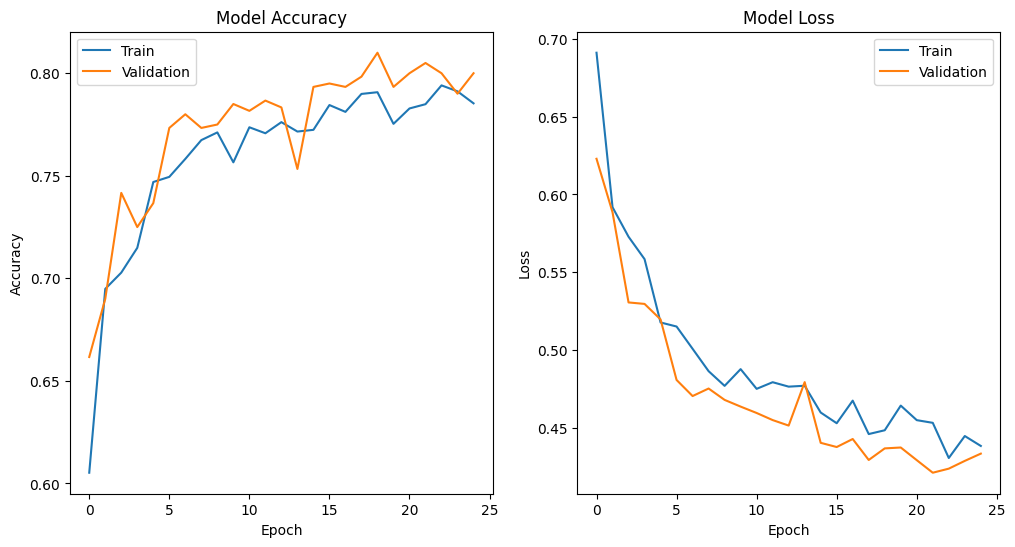

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_transfer.history['accuracy'])
plt.plot(history_transfer.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history_transfer.history['loss'])
plt.plot(history_transfer.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

## Save Model

In [ ]:
model_transfer.save('model_transfer_downsyndrome.keras')

## Fine-Tuning Model

In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-20]:
    layer.trainable = False

In [ ]:
model_transfer.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

In [ ]:
history_fine = model_transfer.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 53s 488ms/step - accuracy: 0.6941 - loss: 0.6012 - val_accuracy: 0.8150 - val_loss: 0.3756
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 370ms/step - accuracy: 0.7975 - loss: 0.4287 - val_accuracy: 0.6533 - val_loss: 0.9511
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 363ms/step - accuracy: 0.8343 - loss: 0.3684 - val_accuracy: 0.8067 - val_loss: 0.4791
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 372ms/step - accuracy: 0.8255 - loss: 0.3956 - val_accuracy: 0.7050 - val_loss: 0.8881
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 365ms/step - accuracy: 0.8626 - loss: 0.3430 - val_accuracy: 0.8583 - val_loss: 0.3510


## Model Evaluation

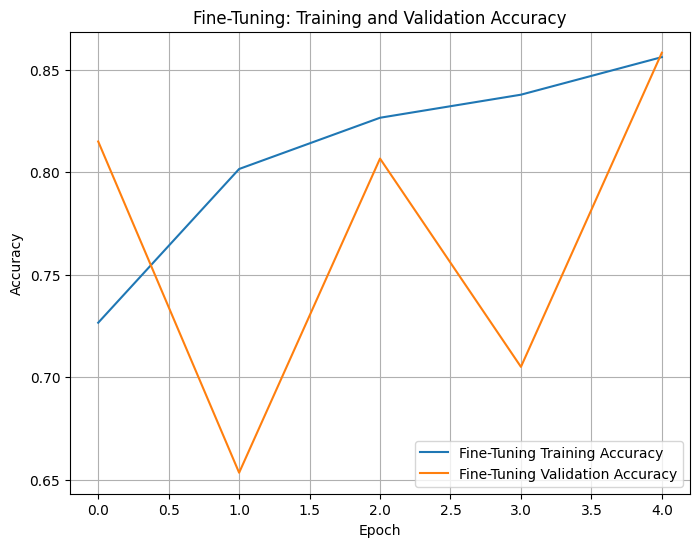

In [ ]:
# Plot Fine-Tuning Results
plt.figure(figsize=(8, 6))
plt.plot(history_fine.history['accuracy'], label='Fine-Tuning Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Fine-Tuning Validation Accuracy')
plt.title('Fine-Tuning: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Save Model

In [ ]:
model.save("model_transfer_downsyndrome.h5")